In [2]:
import numpy as np
import pandas as pd
import math as m
import sympy as sym
import random as rand
import matplotlib.pyplot as plt
import cmath as cm
import matplotlib.ticker as ticker
from IPython.display import display, Latex
import MLE_functions_numpy as fnn

Defining angles/parameters for convenience 

In [3]:
"""# Defining fixed angle values
c90, c90e, c90u = [m.pi/2,-m.pi/2], [m.pi/2,m.pi/2], [m.pi/4,m.pi/2]
c45, c45e, c45u = [0,m.pi/4], [m.pi/2,m.pi/4], [m.pi/2,3*m.pi/4]
c15, c30 =  [0,m.pi/12], [0,m.pi/6]
c15u, c30u =  [3*m.pi/4,3*m.pi/4 + m.pi/12], [3*m.pi/4,3*m.pi/4 + m.pi/6]
c7point5, c3point75 =  [0,m.pi/24], [0,m.pi/48]
c7point5u, c3point75u =  [3*m.pi/4,3*m.pi/4+m.pi/24], [3*m.pi/4,3*m.pi/4 + m.pi/48]
"""

# Defining fixed angle values
c90, c90e, c90u = [0,m.pi/2,0,0,m.pi/4], [-m.pi/4, m.pi/4, 0,0,m.pi/4], [m.pi/6, m.pi/2+m.pi/6, 0,0,m.pi/4]
c45, c45e, c45u = [0,m.pi/4,0,0,m.pi/4], [m.pi/4,2*m.pi/4,0,0,m.pi/4], [m.pi/2, m.pi/2+m.pi/4,0,0,m.pi/4]
c15, c30 =  [0,m.pi/12,0,0,m.pi/4], [0,m.pi/6,0,0,m.pi/4]
c15u, c30u =  [m.pi/2, m.pi/2+m.pi/12,0,0,m.pi/4], [m.pi/2, m.pi/2 + m.pi/6,0,0,m.pi/4]
c7point5, c3point75 =  [0,m.pi/24,0,0,m.pi/4], [0,m.pi/48,0,0,m.pi/4]
c7point5u, c3point75u =  [m.pi/2, m.pi/2+m.pi/24,0,0,m.pi/4], [m.pi/2, m.pi/2 + m.pi/48,0,0,m.pi/4]


In [4]:
# Plotting function for both quantities

def Plotting(N = 10000, c = [1,0,0,1], p = [.5,.5], step = 100, metric = 'f', size = (3,3), k = 10, starting_step = 10, input_type = 'coeff', subplots = 'h', threshold = 'variable', close = False, show_title = False, colors = ['black','blue'], font = 13   ):        # function to plot error vs trials plot. N,c,p are Number of trials, coefficients and priors
    
    if input_type == 'theta':           # Warning: angles must be in radians, order must be theta_0 and theta_1
        if len(c) != 2:
            print("For theta input type only two angles are to be given, in radians.")
        theta_0 = c[0]
        theta = c[1]
        c = [np.cos(theta_0), np.sin(theta_0), np.cos(theta_0+theta), np.sin(theta_0+theta)] # the first state here is the theta_0 angle 
        c = [np.round(i,9) for i in c]                                                   ## from |0> axis, the second theta_0 + theta
    print("Input state coefficients =", c)
    

    count = N//step
    # trials_list = [step*(i+1) for i in range(count)] 
    trials_list = [step*(i) for i in range(1,count+1)]    # only works if N is a multiple of 100
    # sqrtN = [k[0]/((i)**.5) for i in trials_list]    # ideal curve, k is steepness
    # sqrt_fid = [(1-1/((k*i))) for i in trials_list]   #  1/N curve
    
    # inv_sqrt_curve0 = [(1-1/(np.sqrt(k[0]*i))) for i in trials_list]   # Ideal Sq root Curve for Fidelity
    # inv_sqrt_curve1 = [(1-1/(np.sqrt(k[1]*i))) for i in trials_list]   # Ideal Sq root Curve for Fidelity


    errors_list_0 = [] 
    errors_list_1 = []
    convergance = ''
    
    if metric == 'f':
        label_0 = r' Fidelity $| \Psi_0 \rangle $'
        label_1 = r' Fidelity $| \Psi_1\rangle$'
        errors_list_0 = [fid(N= i,c=c,p=p, threshold= threshold, close = close)[-1][0] for i in trials_list]
        errors_list_1 = [fid(N= i,c=c,p=p, threshold= threshold, close = close)[-1][1] for i in trials_list]
        lasts_0 = errors_list_0[len(errors_list_0)*99//100:]
        lasts_1 = errors_list_1[len(errors_list_1)*99//100:]
        # convergance = f'Fidelity Coverged to:  , {()}'
    else: 
        label_0 = r'$\Delta \rho$'
        errors_list_0 = [experiment_rho(i, c , p)[0] for i in trials_list]
        lasts_0 = errors_list_0[len(errors_list_0)*99//100:]
        # convergance = f'Error Coverged to:  , {errors_list_0[-1]}'

    # convergance = 0
    
    # plt.plot(trials_list[starting_step:], errors_list_0[starting_step:], label=label_0)         # skipping plotting the first five entries coz of errors
    # if metric=='f':
        # plt.subplot(1,2,1)
        # if subplots == 'v':
            # plt.subplot(2,1,1)
        # plt.plot(trials_list[starting_step:], errors_list_0[starting_step:], label=label_0)         # skipping plotting the first five entries coz of errors
        # plt.ylabel('Fidelity')
        # plt.title(r'|$\Psi_0\rangle = \ {}|0\rangle + {}|1\rangle$ '.format(round(c[0],3), round(c[1],3)))
        # plt.legend()
        # 
        # plt.subplot(1,2,2)
        # ax1 = plt.subplot(1, 2, 2)
        # if subplots == 'v':
            # plt.subplot(2,1,2)
        # plt.plot(trials_list[starting_step:], errors_list_1[starting_step:], label=label_1, color = 'orange')
        # plt.title(r'|$\Psi_1\rangle = \ {}|0\rangle + {}|1\rangle$ '.format(round(c[2],3), round(c[3],3)))
        # convergance=[np.round((sum(lasts_0)/len(lasts_0)),5), np.round((sum(lasts_1)/len(lasts_1)),5)]  # average convergances
        # plt.legend()
    if metric == 'f':
        fig, axs = plt.subplots(1, 2, figsize= size)
        axs[0].plot(trials_list[starting_step:], errors_list_0[starting_step:], label=label_0, color= colors[0], linestyle = '-' )  # first subplot
        # axs[0].text(0.5, -0.1, r'|\psi_0 \rangle', ha='center', transform=axs[0].transAxes)
        
        axs[1].plot(trials_list[starting_step:], errors_list_1[starting_step:], label=label_1, color= colors[1]) # Otherwise, plot on the first subplot
        
        plt.subplots_adjust(wspace=0.2)

        axs[0].set_xlabel(r'Trials N', fontsize = font)
        axs[0].set_ylabel('Fidelity' , fontsize = font)
        axs[1].set_xlabel(r'Trials N', fontsize = font)

        axs[0].legend([r'$|\langle \psi_0|\psi_{0num}\rangle|^2$'])
        axs[1].legend([r'$|\langle \psi_1|\psi_{1num}\rangle|^2$'])
        
        axs[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=3)) 
        axs[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=3)) 
        # axs[0].yaxis.set_major_locator(ticker.MaxNLocator(nbins=6)) 
        # axs[1].yaxis.set_major_locator(ticker.MaxNLocator(nbins=6)) 
    else:
        fig, axs = plt.subplots(figsize= size)
        axs.plot(trials_list[starting_step:], errors_list_0[starting_step:], label=label_0)         # skipping plotting the first five entries coz of errors
        # plt.plot(trials_list[starting_step//2:],sqrtN[starting_step//2:], "--", label= r'$\frac{1}{\sqrt{kN}}$;'+f" k = {k}")
        # convergance=[np.round((sum(lasts_0)/len(lasts_0)),7)]  # average convergances
    if show_title == True:
        plt.suptitle(r'$|\Psi_0\rangle = (1|0\rangle + 0|1\rangle)$ & $|\Psi_1\rangle = (\frac{{1}}{{\sqrt{{2}}}}|0\rangle + \frac{{1}}{{\sqrt{{2}}}}|1\rangle)$ with priors $\eta_i$ = ({}, {})'.format(p[0],p[1]))
    # plt.suptitle(r'$|\Psi_0\rangle = 1|0\rangle + 0|1\rangle$ & $|\Psi_1\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$ with priors $\eta_i$ = ({}, {})'.format( p[0], p[1]))

    # plt.suptitle(r'$|\Psi_0\rangle = {}|0\rangle + {} |1\rangle$ & $|\Psi_1\rangle = {}|0\rangle + {} |1\rangle$ with priors $\eta_i$ = ({}, {})'.format(c[0],c[1],c[2],c[3],p[0], p[1]))       
    # plt.suptitle(r'$|\Psi_0\rangle = {}|0\rangle + {} |1\rangle$ & $|\Psi_1\rangle = {}|0\rangle + {} |1\rangle$ with priors $\eta_i$ = ({}, {})'.format(c[0],c[1],c[2],c[3],p[0], p[1]))       
    
    
    plt.show()



In [5]:
def Plotting(N=10000, c=[1, 0, 0, 1], p=[.5, .5], step=100, metric='f', size=(3, 3), starting_step=10, input_type='coeff', colors=['black', 'blue'], font=13, show_title=False):
    if input_type == 'theta':
        if len(c) != 2:
            print("For theta input type only two angles are to be given, in radians.")
        theta_0, theta = c
        c = [np.cos(theta_0), np.sin(theta_0), np.cos(theta_0 + theta), np.sin(theta_0 + theta)]
        c = [np.round(i, 9) for i in c]
    print("Input state coefficients =", c)

    trials_list = [step * i for i in range(1, N // step + 1)]
    errors_list_0, errors_list_1 = [], []

    if metric == 'f':
        label_0, label_1 = r' Fidelity $| \Psi_0 \rangle $', r' Fidelity $| \Psi_1\rangle$'
        # Assuming fid function is defined elsewhere to calculate fidelity
        errors_list_0 = [fid(N=i, c=c, p=p)[-1][0] for i in trials_list]
        errors_list_1 = [fid(N=i, c=c, p=p)[-1][1] for i in trials_list]
    else:
        label_0 = r'$\Delta \rho$'
        # Assuming experiment_rho function is defined elsewhere to calculate rho
        errors_list_0 = [experiment_rho(i, c, p)[0] for i in trials_list]

    if metric == 'f':
        fig, axs = plt.subplots(1, 2, figsize=size)
        axs[0].plot(trials_list[starting_step:], errors_list_0[starting_step:], label=label_0, color=colors[0], linestyle='-')
        axs[1].plot(trials_list[starting_step:], errors_list_1[starting_step:], label=label_1, color=colors[1])
        plt.subplots_adjust(wspace=0.2)
        axs[0].set_xlabel(r'Trials N', fontsize=font)
        axs[0].set_ylabel('Fidelity', fontsize=font)
        axs[1].set_xlabel(r'Trials N', fontsize=font)
        axs[0].legend([r'$|\langle \psi_0|\psi_{0num}\rangle|^2$'])
        axs[1].legend([r'$|\langle \psi_1|\psi_{1num}\rangle|^2$'])
        axs[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
        axs[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
    else:
        fig, axs = plt.subplots(figsize=size)
        axs.plot(trials_list[starting_step:], errors_list_0[starting_step:], label=label_0)

    if show_title:
        plt.suptitle(r'$|\Psi_0\rangle = (1|0\rangle + 0|1\rangle)$ & $|\Psi_1\rangle = (\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle)$ with priors $\eta_i$ = ({}, {})'.format(p[0], p[1]))

    plt.show()

In [58]:
def Plotting(N=10000, params = [0,m.pi/2, 0,0, m.pi/4], step=100, main_seed = 42, threshold = 'variable', size=(3, 3), starting_step=10, colors=['black', 'blue'], font=13, show_title=False, metric = 'ppm', plot = 'bar', bars_width = 15):

    # create a random list of integers between 0 and N
    np.random.seed(main_seed)
    seeds = np.random.randint(0, 10*N, 2*N)


    trials_list = [step * i for i in range(1, N // step + 1)]

    label_0, label_1 = r' Fidelity $| \Psi_0 \rangle $', r' Fidelity $| \Psi_1\rangle$'
    # Assuming fid function is defined elsewhere to calculate fidelity
    errors_list = [fnn.Inversion_new(N = i, params= params, threshold = threshold, an_pr = True, seed = int(seeds[i]))[0] for i in trials_list]  
    # uses predefined Inversion_new function to get its first output which comprises of the fidelities calculated three different ways. 
    # Seed is fixed, it is the ith element of the seeds list, which in turn is itself fixed by main_seed.
    
    errors_list_0 = [i[-1][0] for i in errors_list]
    errors_list_1 = [i[-1][1] for i in errors_list]
    
    if metric == 'ppm':
        ppm_list_0 = [ (1-i)*1e6 for i in errors_list_0]
        ppm_list_1 = [ (1-i)*1e6 for i in errors_list_1]
        errors_list_0 = ppm_list_0
        errors_list_1 = ppm_list_1

    fig, axs = plt.subplots(1, 2, figsize=size)
    if plot != 'bar':
        axs[0].plot(trials_list[starting_step:], errors_list_0[starting_step:], label=label_0, color=colors[0], linestyle='-')
        axs[1].plot(trials_list[starting_step:], errors_list_1[starting_step:], label=label_1, color=colors[1])
    if plot == 'bar':
        axs[0].bar(trials_list[starting_step:], errors_list_0[starting_step:], label=label_0, color=colors[0], linestyle='-', width = bars_width)
        axs[1].bar(trials_list[starting_step:], errors_list_1[starting_step:], label=label_1, color=colors[1], width = bars_width)
    plt.subplots_adjust(wspace=0.2)
    axs[0].set_xlabel(r'Trials N', fontsize=font)
    axs[0].set_ylabel('Fidelity', fontsize=font)
    if metric == 'ppm':
        axs[0].set_ylabel('PPM error', fontsize=font)
    axs[1].set_xlabel(r'Trials N', fontsize=font)
    axs[0].legend([r'$|\langle \psi_0|\psi_{0num}\rangle|^2$'])
    axs[1].legend([r'$|\langle \psi_1|\psi_{1num}\rangle|^2$'])
    axs[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
    axs[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
    if show_title:
        plt.suptitle('Parameters equal ({}, {})'.format(*params))
    plt.show()
# Example 

In [44]:
# def rn(N, main_seed = 42):
#     np.random.seed(main_seed)
#     seeds = np.random.randint(0, 10*N, N)
#     print(len(seeds))
#     print('\n')
#     print(seeds)



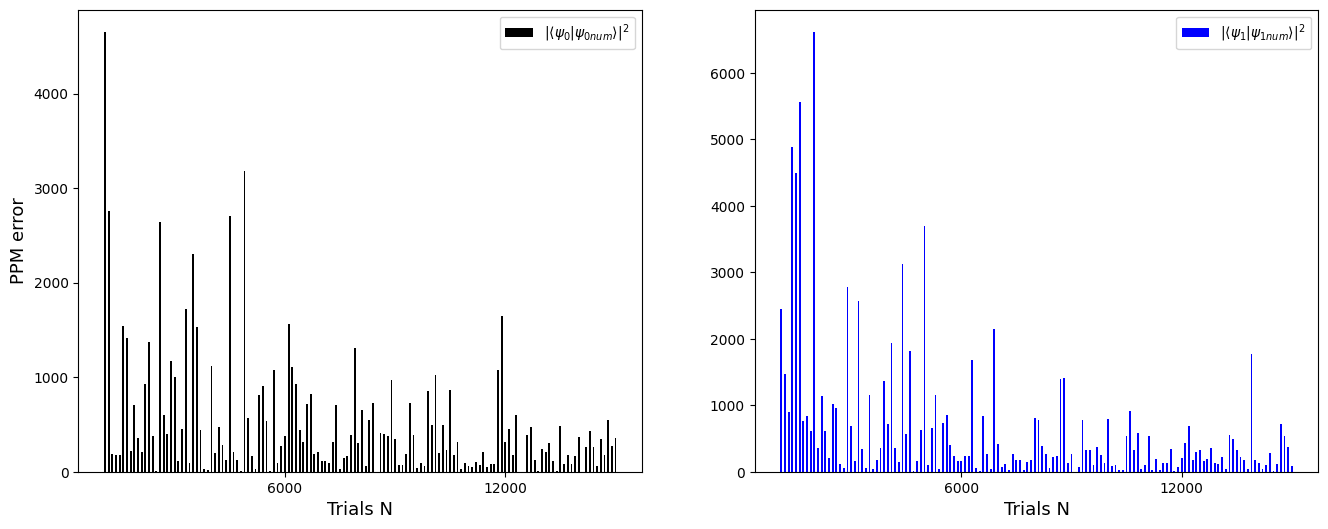

In [64]:
Plotting(N=15000, params = [m.pi/4,m.pi/2+m.pi/4, 0,0, m.pi/4], step=100, threshold = .008, size=(16, 6), starting_step=10, bars_width = 50)

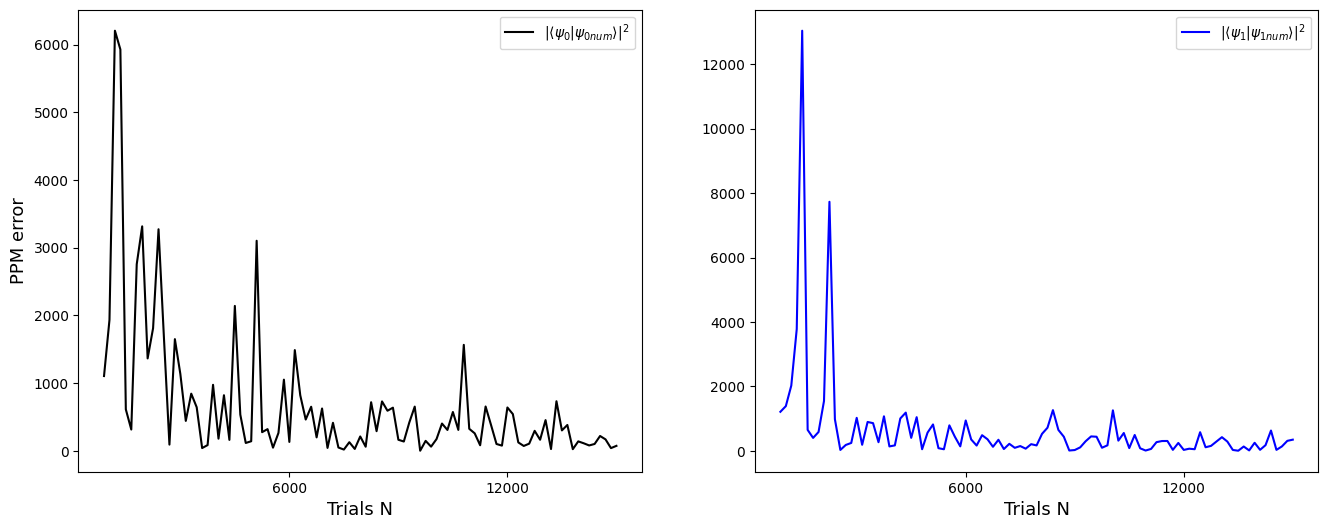

In [73]:
Plotting(N=15000, params = [m.pi/4,m.pi/2+m.pi/4, 0,0, m.pi/4], step=150, main_seed = 15, threshold = .008, size=(16, 6), starting_step=5, plot = 'line')

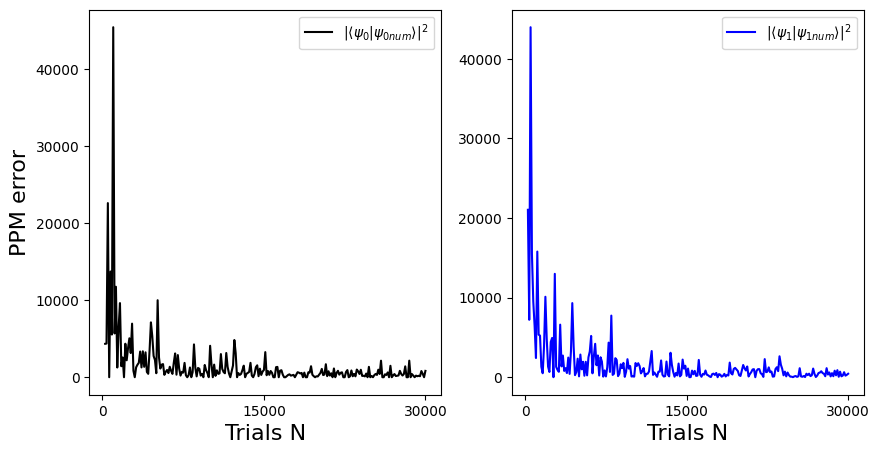

In [74]:
# reproducing the main result on the figure from the paper: # # Plotting(c= [0,m.pi/4] ,  N=30000,  step = 125, size= [10,5],  starting_step=1, threshold=.008, input_type = 'theta', colors=['black', 'red'], font= 16)

Plotting(N=30000, params = [0,m.pi/4, 0,0, m.pi/4], step=125, main_seed = 15, threshold = .008, size=(10, 5), starting_step=1, plot = 'line', font = 16)


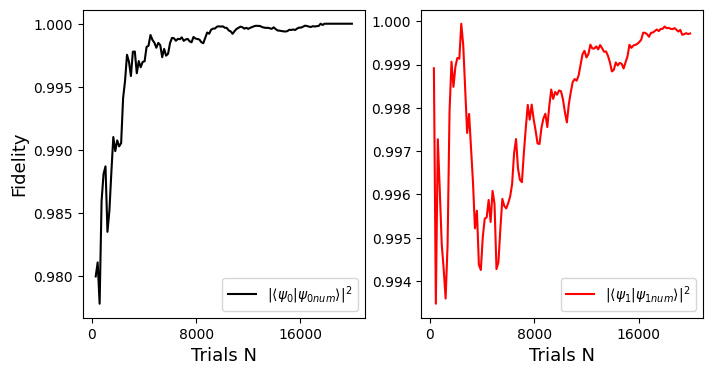

In [18]:
# N=30000,  step = 125, size= [10,5],  starting_step=1, threshold=.008, input_type = 'theta', colors=['black', 'red'], font= 16
Plotting(N=20000, params = [0, m.pi/4, 0,0, m.pi/4], step=150, threshold = .008, size=(8, 4), starting_step=1, colors=['black', 'red'], show_title=False)

Input state coefficients = [0.951056516, 0.309016994, 0.629320391, 0.777145961]


/var/folders/z5/8__h5b611fz3d61c954t7_540000gp/T/ipykernel_12165/3238703285.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  inv_sqrt_curve0 = [(1-1/(np.sqrt(k[0]*i))) for i in trials_list]   # Ideal Sq root Curve for Fidelity
/var/folders/z5/8__h5b611fz3d61c954t7_540000gp/T/ipykernel_12165/3238703285.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  inv_sqrt_curve1 = [(1-1/(np.sqrt(k[1]*i))) for i in trials_list]   # Ideal Sq root Curve for Fidelity
/var/folders/z5/8__h5b611fz3d61c954t7_540000gp/T/ipykernel_12165/3238703285.py:53: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


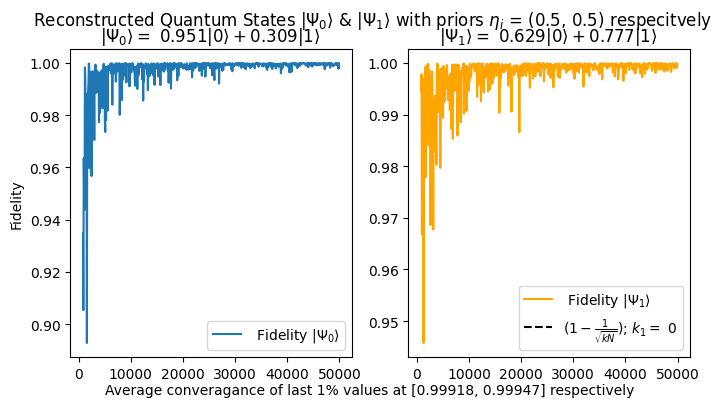

In [11]:
# 15 degrees

# Plotting(c= c15,  N=10000 ,  step= 50, size=[5,5],  k = 1/50,  starting_step= 5, input_type = 'theta')
Plotting(c= [m.pi/10, m.pi/10+m.pi/12],  N=50000,  step= 75, size=[8,4], k = 0,  starting_step= 10, input_type = 'theta')
# Plotting(c= c15u,  N=100000,  step= 200, size=[5,5], k = 1/50,  starting_step= 5, input_type = 'theta')

##Final Plots for submission

##Final Plots for submission

##Final Plots for submission

##Final Plots for submission

##Final Plots for submission

##Final Plots for submission

Input state coefficients = [0.0, 1.0, 1.0, 0.0]


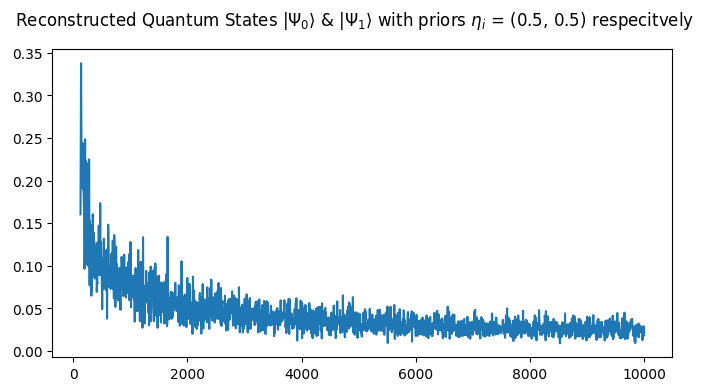

In [39]:
Plotting(c= c90 ,  N=10000,  step = 5, size=[8,4],  starting_step= 25, input_type = 'theta', metric = 0)

Input state coefficients = [0.0, 1.0, 1.0, 0.0]


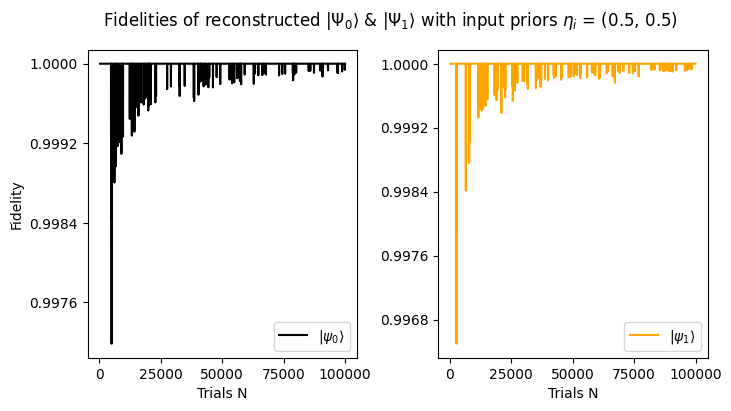

Input state coefficients = [0.0, 1.0, 1.0, 0.0]


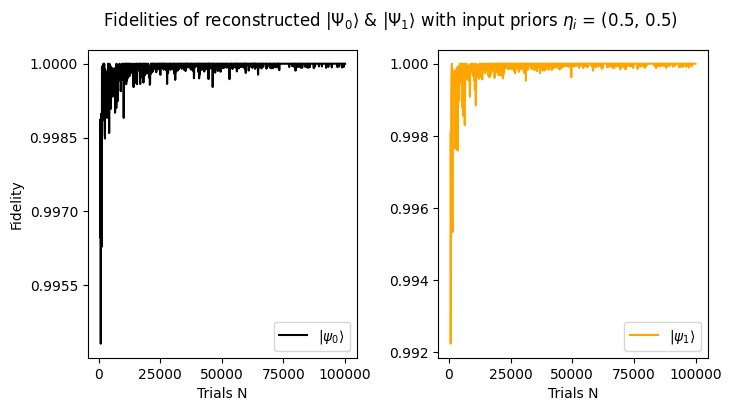

Input state coefficients = [0.0, 1.0, 1.0, 0.0]


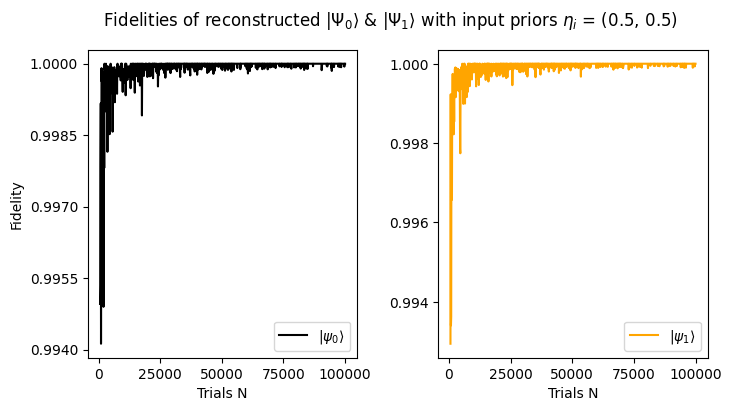

In [133]:
# 90 degrees horizontal 
Plotting(c= c90 ,  N=100000,  step = 50, k = 0, size=[8,4],  starting_step= 5, input_type = 'theta')
Plotting(c= c90 ,  N=100000,  step = 100, k = 0, size=[8,4],  starting_step=5, input_type = 'theta', threshold = .01)
Plotting(c= c90 ,  N=100000,  step = 100, k = 0, size=[8,4],  starting_step=5, input_type = 'theta', threshold = .01)

Input state coefficients = [1.0, 0.0, 0.866025404, 0.5]


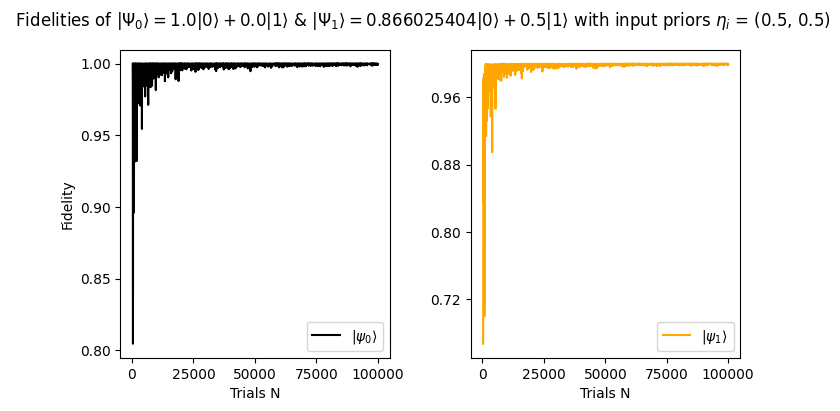

Input state coefficients = [1.0, 0.0, 0.866025404, 0.5]


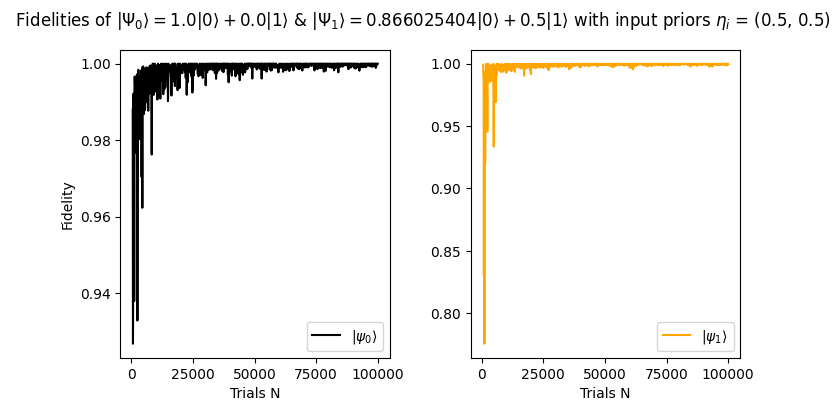

Input state coefficients = [1.0, 0.0, 0.866025404, 0.5]


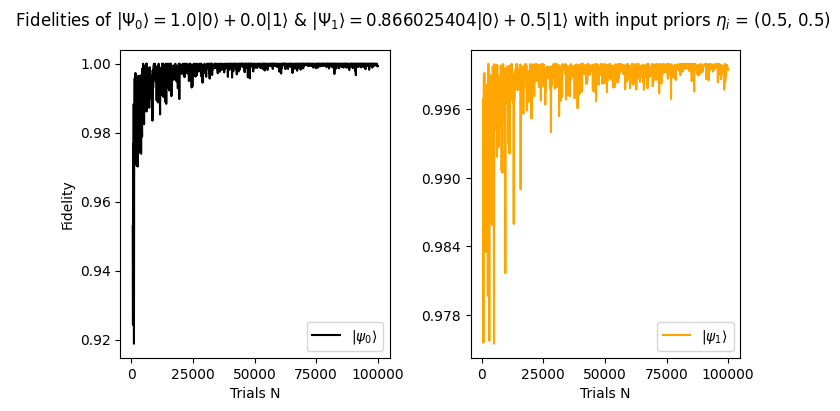

In [158]:
# 30 degrees horizontal 
Plotting(c= [0,m.pi/6] ,  N=100000,  step = 50, k = 0, size=[8,4],  starting_step= 5, input_type = 'theta')
Plotting(c= [0,m.pi/6] ,  N=100000,  step = 100, k = 0, size=[8,4],  starting_step=5, input_type = 'theta', threshold = .01)
Plotting(c= [0,m.pi/6] ,  N=100000,  step = 100, k = 0, size=[8,4],  starting_step=5, input_type = 'theta', threshold = .01)

Input state coefficients = [1.0, 0.0, 0.707106781, 0.707106781]


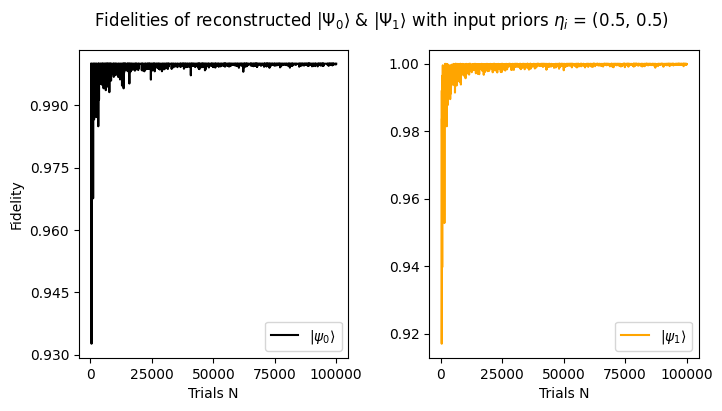

Input state coefficients = [1.0, 0.0, 0.707106781, 0.707106781]


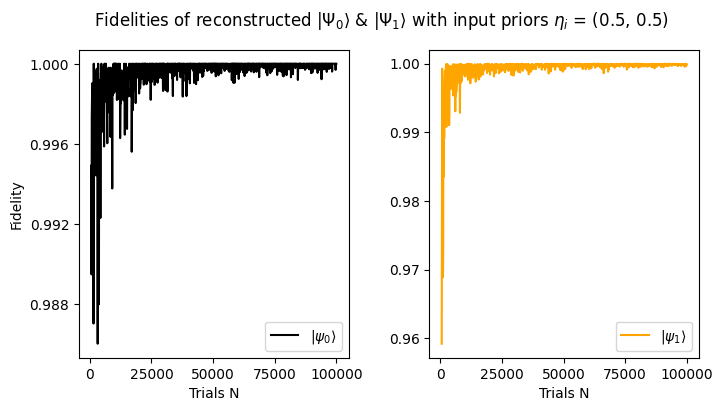

Input state coefficients = [1.0, 0.0, 0.707106781, 0.707106781]


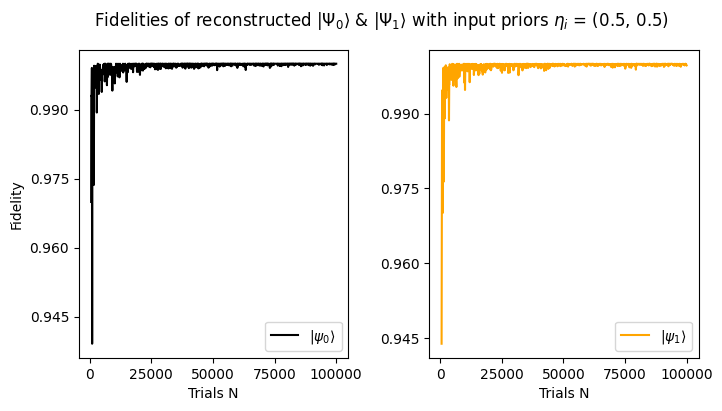

In [154]:
#45 degrees horizontal 
Plotting(c= [0,m.pi/4] ,  N=100000,  step = 50, k = 0, size=[8,4],  starting_step= 5, input_type = 'theta')
Plotting(c= [0,m.pi/4] ,  N=100000,  step = 100, k = 0, size=[8,4],  starting_step=5, input_type = 'theta', threshold = .01)
Plotting(c= [0,m.pi/4] ,  N=100000,  step = 100, k = 0, size=[8,4],  starting_step=5, input_type = 'theta', threshold = .01)


Input state coefficients = [1.0, 0.0, 0.5, 0.866025404]


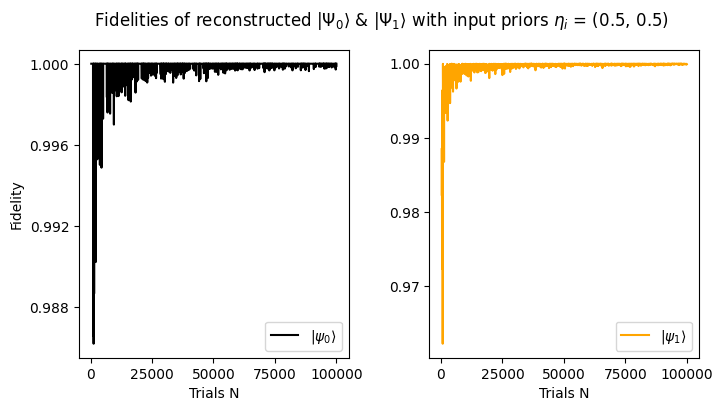

Input state coefficients = [1.0, 0.0, 0.5, 0.866025404]


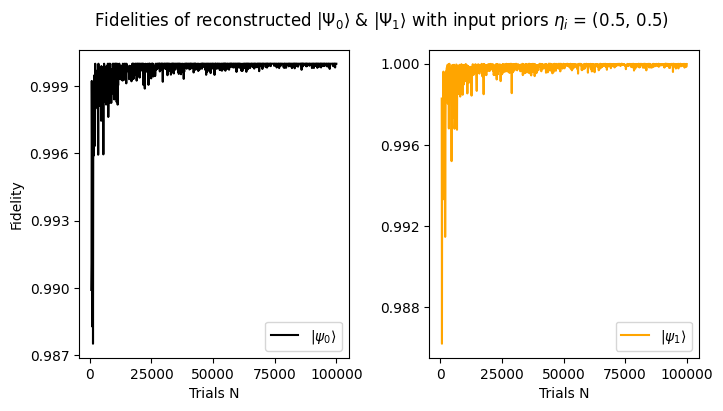

Input state coefficients = [1.0, 0.0, 0.5, 0.866025404]


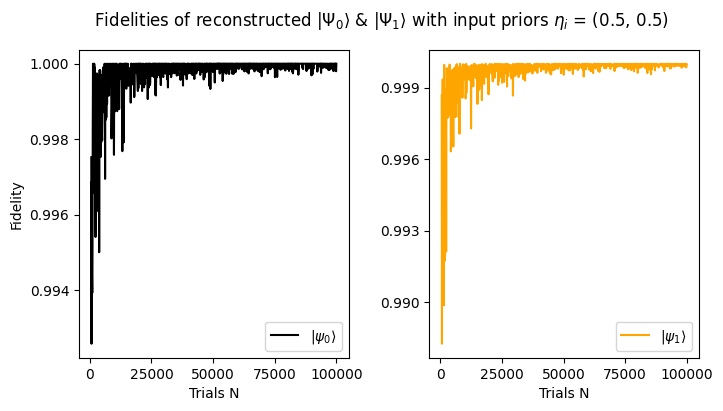

In [136]:
# 60 degrees horizontal 
Plotting(c= [0,m.pi/3] ,  N=100000,  step = 50, k = 0, size=[8,4],  starting_step= 5, input_type = 'theta')
Plotting(c= [0,m.pi/3] ,  N=100000,  step = 100, k = 0, size=[8,4],  starting_step=5, input_type = 'theta', threshold = .01)
Plotting(c= [0,m.pi/3] ,  N=100000,  step = 100, k = 0, size=[8,4],  starting_step=5, input_type = 'theta', threshold = .01)


Input state coefficients = [1.0, 0.0, 0.707106781, 0.707106781]


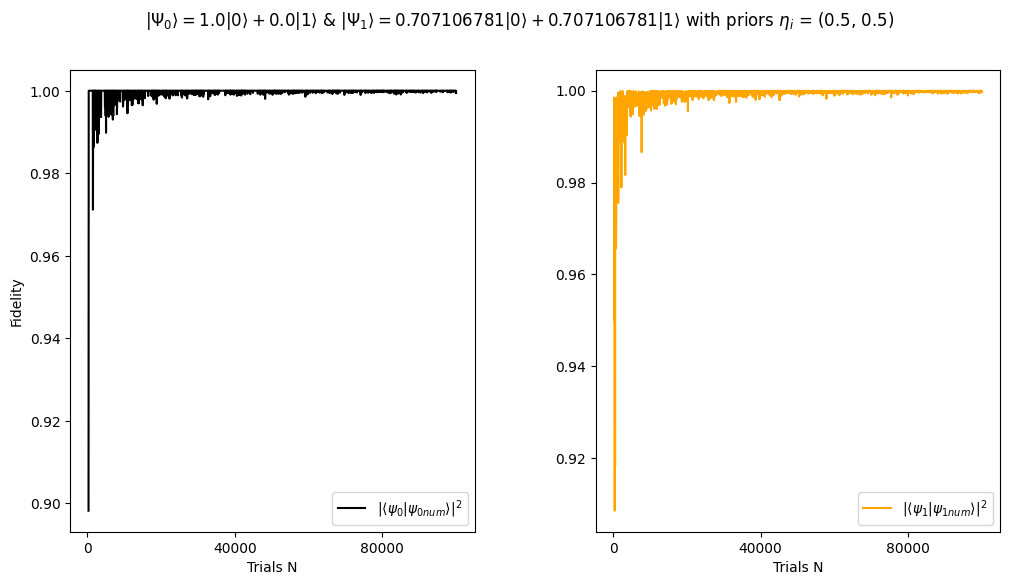

Input state coefficients = [1.0, 0.0, 0.707106781, 0.707106781]


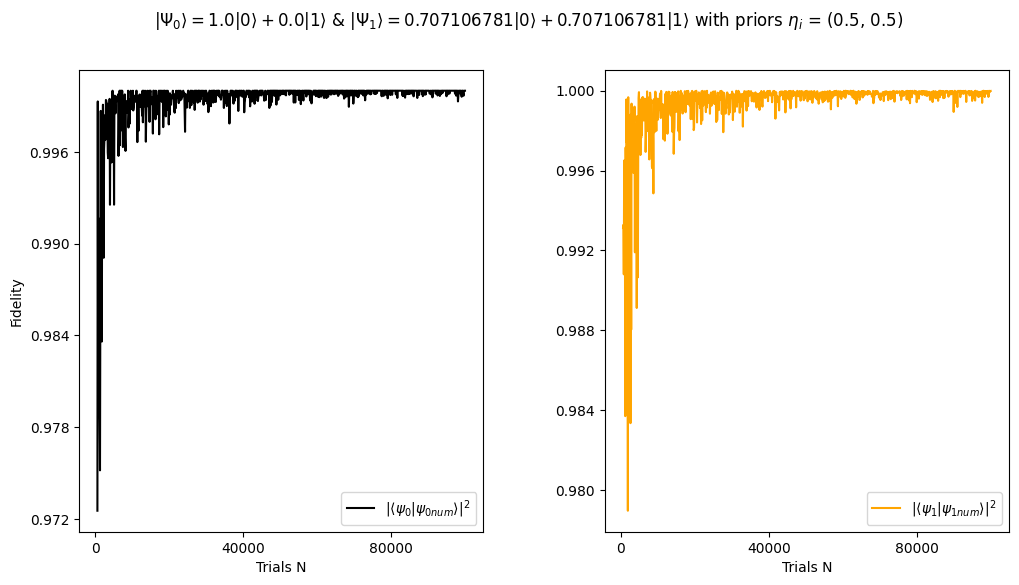

Input state coefficients = [1.0, 0.0, 0.707106781, 0.707106781]


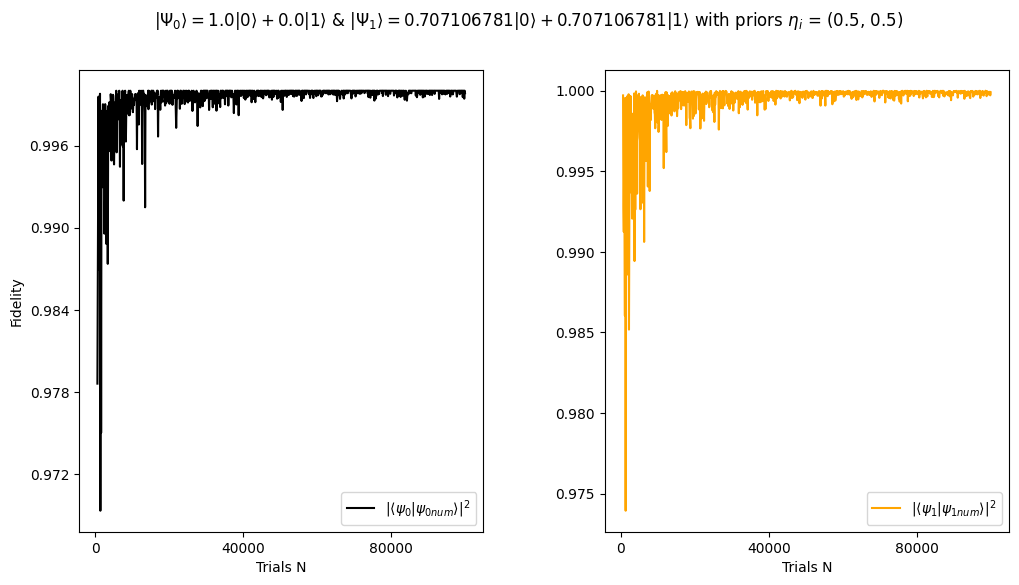

In [165]:
#45 degrees 01
Plotting(c= [0,m.pi/4] ,  N=100000,  step = 50, k = 0, size= [10,5],  starting_step=4, input_type = 'theta')
Plotting(c= [0,m.pi/4] ,  N=100000,  step = 100, k = 0, size=[10,5],  starting_step=4, input_type = 'theta', threshold = .01)
Plotting(c= [0,m.pi/4] ,  N=100000,  step = 100, k = 0, size=[10,5],  starting_step=4, input_type = 'theta', threshold = .05)


Input state coefficients = [1.0, 0.0, 0.707106781, 0.707106781]


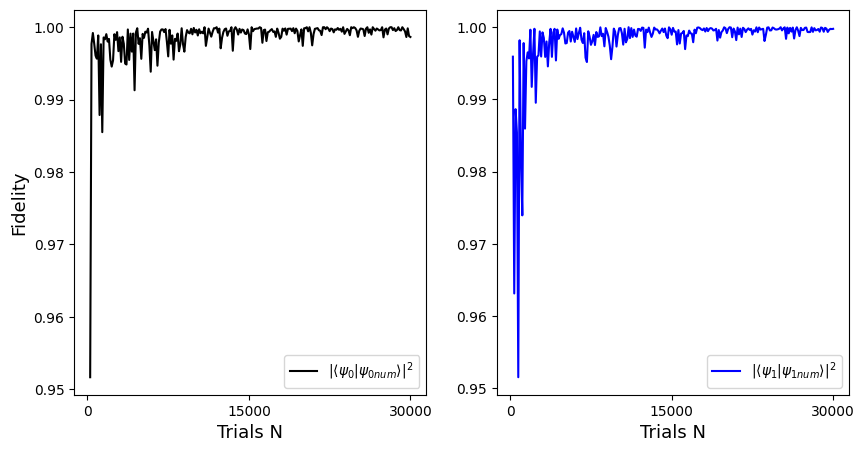

Input state coefficients = [1.0, 0.0, 0.707106781, 0.707106781]


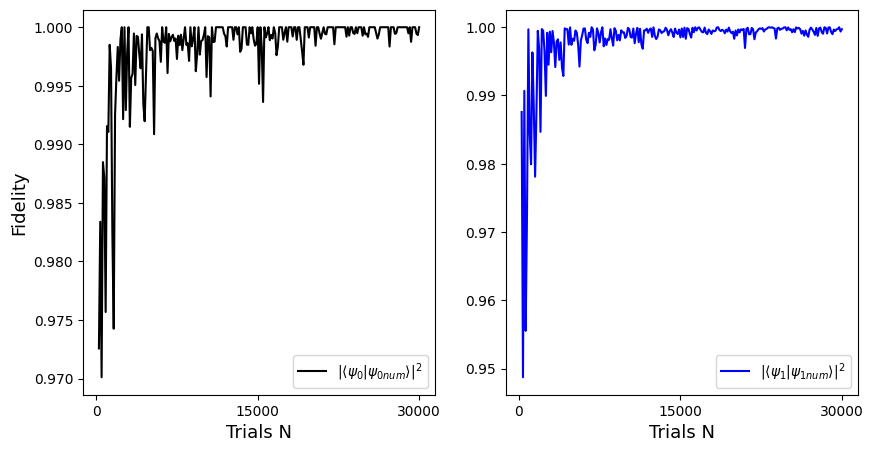

Input state coefficients = [1.0, 0.0, 0.707106781, 0.707106781]


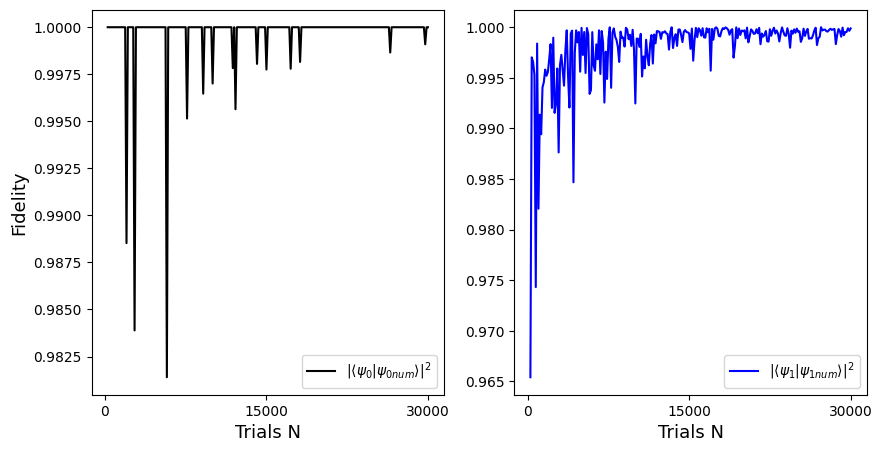


 CHOSEN ONE

Input state coefficients = [1.0, 0.0, 0.707106781, 0.707106781]


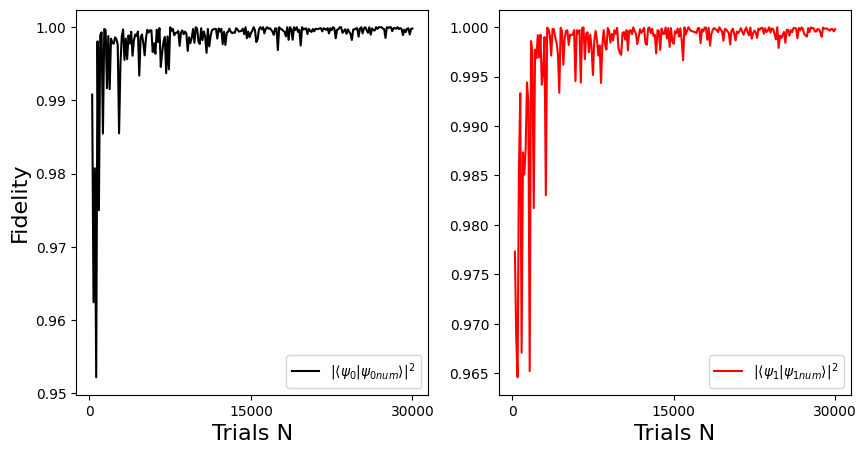

In [29]:
#45 degrees 02
Plotting(c= [0,m.pi/4] ,  N=30000,  step = 125, k = 0, size=[10,5],  starting_step=1, input_type = 'theta', threshold = .008)
Plotting(c= [0,m.pi/4] ,  N=30000,  step = 125, k = 0, size=[10,5],  starting_step=1, input_type = 'theta', threshold = .018)
Plotting(c= [0,m.pi/4] ,  N=30000,  step = 125, k = 0, size= [10,5],  starting_step=1, input_type = 'theta')

# chosen one
print("\n CHOSEN ONE\n")
# Plotting(c= [0,m.pi/4] ,  N=30000,  step = 125, size= [10,5],  starting_step=1, threshold=.008, input_type = 'theta', colors=['black', 'red'])
Plotting(c= [0,m.pi/4] ,  N=30000,  step = 125, size= [10,5],  starting_step=1, threshold=.008, input_type = 'theta', colors=['black', 'red'], font= 16)


Input state coefficients = [1.0, 0.0, 0.5, 0.866025404]


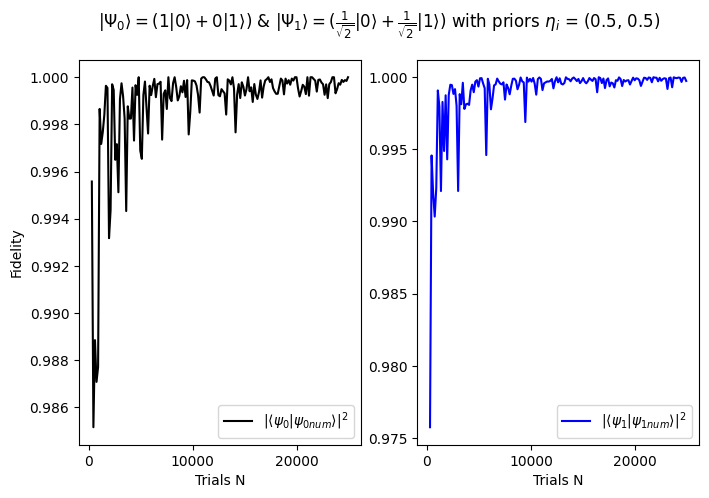

Input state coefficients = [1.0, 0.0, 0.5, 0.866025404]


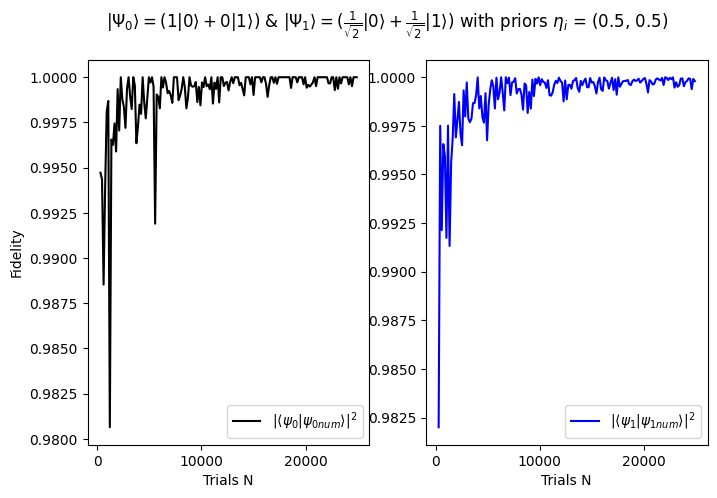

Input state coefficients = [1.0, 0.0, 0.5, 0.866025404]


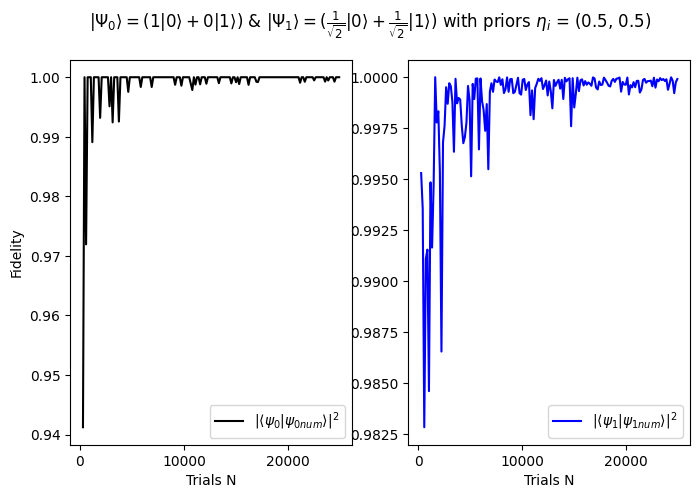

In [241]:
#60 degrees 01
Plotting(c= [0,m.pi/3] ,  N=25000,  step = 150, k = 0, size=[8,5],  starting_step=1, input_type = 'theta', threshold = .008)
Plotting(c= [0,m.pi/3] ,  N=25000,  step = 150, k = 0, size=[8,5],  starting_step=1, input_type = 'theta', threshold = .018)
Plotting(c= [0,m.pi/3] ,  N=25000,  step = 150, k = 0, size=[8,5],  starting_step=1, input_type = 'theta')

Input state coefficients = [1.0, 0.0, 0.866025404, 0.5]


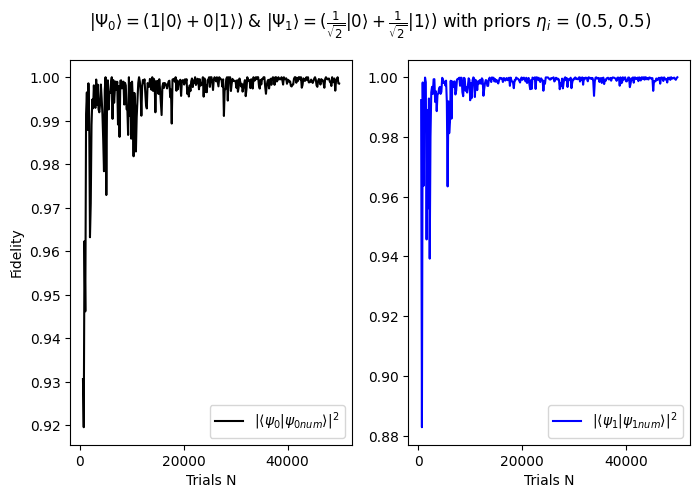

Input state coefficients = [1.0, 0.0, 0.866025404, 0.5]


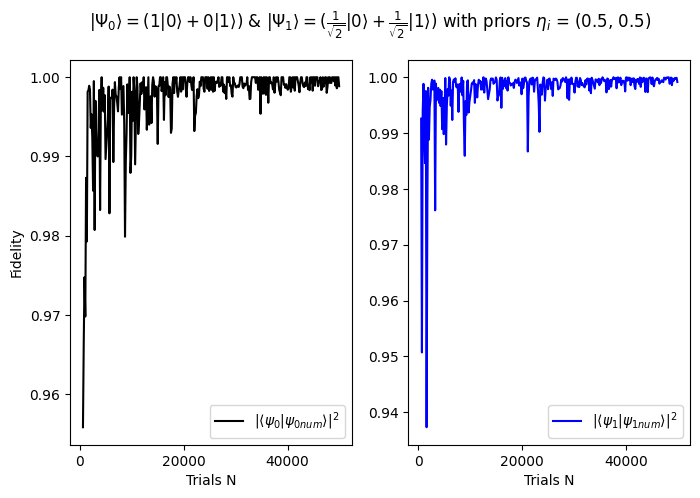

Input state coefficients = [1.0, 0.0, 0.866025404, 0.5]


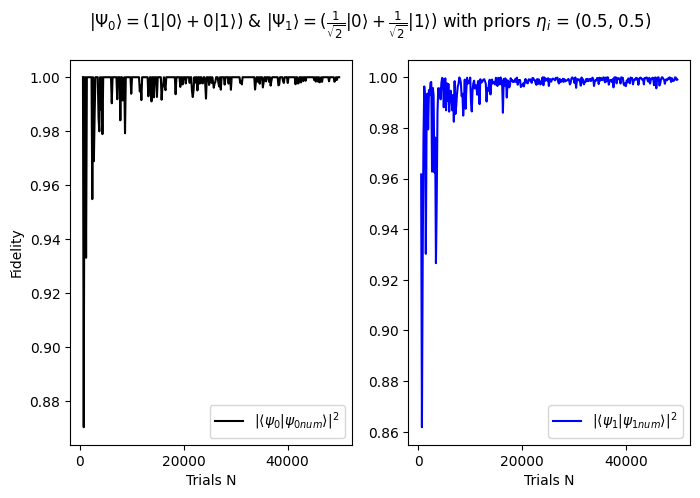

In [247]:
#30 degrees 01
Plotting(c= [0,m.pi/6] ,  N=50000,  step = 150, k = 0, size=[8,5],  starting_step=3, input_type = 'theta', threshold = .008)
Plotting(c= [0,m.pi/6] ,  N=50000,  step = 150, k = 0, size=[8,5],  starting_step=3, input_type = 'theta', threshold = .012)
Plotting(c= [0,m.pi/6] ,  N=50000,  step = 150, k = 0, size=[8,5],  starting_step=3, input_type = 'theta')